In [102]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm,os
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from math import pi, cos, sin 
from scipy.optimize import fsolve

In [103]:
def E(eps):
    return float((1+eps)**2/(1-eps)**2)

In [107]:
def eq(alpha):
    #return (E(eps)-1)*cos((E(eps)-1)*alpha*s) + (E(eps)+1)*cos((E(eps)+1)*alpha*s)
    return E(eps)*cos(E(eps)*alpha*s)*cos(alpha*s) - sin(E(eps)*alpha*s)*sin(alpha*s)

In [108]:
eps = 0.4
l=6.0
s=l/2

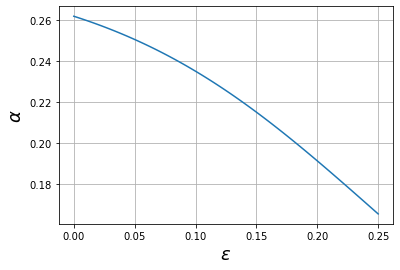

In [109]:
Eps = []
A = []
N = 100
q = 0.25

for i in range(101):
    Eps.append(float(i*q/N))
    eps = Eps[i]
    A.append(fsolve(eq, 0.25))
ax = plt.gca()
ax.plot(Eps, A)
ax.set_xlabel(r'$\varepsilon$', fontsize=18)
ax.set_ylabel(r'$\alpha$', fontsize=18)
ax.grid(True)

In [55]:
def k1(a, eps):
    return -cos(E(eps)*a*s)/sin(E(eps)*a*s)
def k2(a, eps):
    return -sin(a*s)/cos(a*s)/E(eps)

def w(x_):
    k1 = -sin(a*s)/(E(eps)*cos(a*s))
    k2 = 1/cos(a*s)
    if x_ <= s:
        x = x_
        return k2*(cos(a*x)-1)
    else:
        x = x_-s
        return cos(E(eps)*a*x) + k1*sin(E(eps)*a*x) - k2

In [112]:
print(Eps[0], Eps[30], Eps[60])

0.0 0.075 0.15


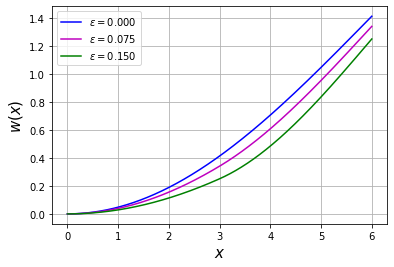

In [119]:
N = 600
t = l/N
ax = plt.gca()

n = 0
eps = Eps[n]
a = A[n]
X = [i*t for i in range(N+1)]
W = [-w(X[i]) for i in range(N+1)]
ax.plot(X, W, label = r'$ \varepsilon = 0.000 $', color ='b')

n = 30
eps = Eps[n]
a = A[n]
X = [i*t for i in range(N+1)]
W = [-w(X[i]) for i in range(N+1)]
ax.plot(X, W, label = r'$ \varepsilon = 0.075 $', color ='m')

n = 60
eps = Eps[n]
a = A[n]
X = [i*t for i in range(N+1)]
W = [-w(X[i]) for i in range(N+1)]
ax.plot(X, W, label = r'$ \varepsilon = 0.150 $', color ='g')
#ax.set_xlim([0,6])
ax.set_xlabel(r'$x$', fontsize=15)
ax.set_ylabel(r'$w(x)$', fontsize=15)
ax.legend()
ax.grid(True)

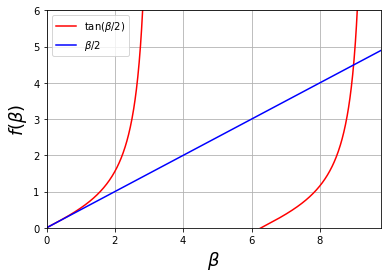

In [101]:
M = 1000
T = [float(i*10/M) for i in range(M+1)]
ax = plt.gca()
TG = [sin(T[i]/2) / cos(T[i]/2) for i in range(M+1)]
LT = [T[i]/2 for i in range(M+1)]
p = 315
mo = 943
ax.plot(T[:p], TG[:p], label = r'$ \tan(\beta/2) $', color ='r')
ax.plot(T[p+1:mo], TG[p+1:mo], color ='r')
ax.plot(T, LT, label = r'$ \beta/2 $', color ='b')
ax.set_ylim([0,6])
ax.set_xlim([0,9.8])
ax.set_xlabel(r'$\beta$', fontsize=18)
ax.set_ylabel(r'$f(\beta)$', fontsize=18)
ax.legend()
ax.grid(True)

In [43]:
# for i in range(101):
#     print("%17f" %(k1(A[i], Eps[i]) - k2(A[i], Eps[i])))

In [25]:
# X = np.array([0.0001*i  for i in range(10001)], float)
# A = []
# eps = 0.07
# for x in X:
#     A.append(eq(x))
# ax = plt.gca()
# ax.plot(X, A)

# ax.grid(True)